In [1]:
import cv2
from PIL import Image

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_cats = '/home/admin1/opencv/Convolutional-Neural-Networks/Convolutional_Neural_Networks/dataset/training_set/cats'
train_dogs = '/home/admin1/opencv/Convolutional-Neural-Networks/Convolutional_Neural_Networks/dataset/training_set/dogs'

test_cats = '/home/admin1/opencv/Convolutional-Neural-Networks/Convolutional_Neural_Networks/dataset/test_set/cats'
test_dogs = '/home/admin1/opencv/Convolutional-Neural-Networks/Convolutional_Neural_Networks/dataset/test_set/dogs'

In [3]:
print('Number of images of Cats in training dataset are-', len(os.listdir(train_cats)))
print('Number of images of Dogs in training dataset are-', len(os.listdir(train_dogs)))
print('Number of images of Cats in test dataset are-', len(os.listdir(test_cats)))
print('Number of images of Cats in ttest dataset are-', len(os.listdir(test_dogs)))

Number of images of Cats in training dataset are- 4001
Number of images of Dogs in training dataset are- 4001
Number of images of Cats in test dataset are- 1001
Number of images of Cats in ttest dataset are- 1001


# Initialising the CNN

In [4]:
model = tf.keras.Sequential()

# Convolution Layer and MaxPooling Layer

In [5]:
model.add(tf.keras.layers.Convolution2D(filters = 32, kernel_size = (3, 3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(tf.keras.layers.Convolution2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2))

# Flattening

In [6]:
model.add(tf.keras.layers.Flatten()) ## this converts our 3D feature maps to 1D feature vectors

# Fully Connected Layer

In [7]:
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

# Output Layer

In [8]:
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Compiling the model

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

# Fitting the CNN to the Images

### Image Augmentaion

# Training Dataset

In [11]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                               shear_range = 0.1,
                                                               zoom_range = 0.1,
                                                               horizontal_flip = True)

In [12]:
training_set = train_datagen.flow_from_directory(directory ='/home/admin1/opencv/Convolutional-Neural-Networks/Convolutional_Neural_Networks/dataset/training_set',
                                                target_size = (150,150),
                                                batch_size = 250,
                                                class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [13]:
len(training_set)

32

# Test Dataset

In [14]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [15]:
test_datagen

In [16]:
test_set = test_datagen.flow_from_directory(directory = '/home/admin1/opencv/Convolutional-Neural-Networks/Convolutional_Neural_Networks/dataset/test_set',
                                           target_size = (150, 150),
                                           batch_size = 250,
                                           class_mode = 'binary') # since we use binary_crossentropy loss, we need binary labels

Found 2000 images belonging to 2 classes.


In [17]:
len(test_set)

8

# Fitting the images  to CNN

In [21]:
batch_size = 250
predictions = model.fit_generator(generator = training_set,
                                 steps_per_epoch = 8000 / batch_size,
                                 epochs = 10,
                                 validation_data = test_set,
                                 validation_steps = 2000 / batch_size)

Epoch 1/10
32/32 [==============================] - 201s 6s/step - loss: 0.8749 - accuracy: 0.5381 - val_loss: 0.6978 - val_accuracy: 0.5240
Epoch 2/10
32/32 [==============================] - 193s 6s/step - loss: 0.6637 - accuracy: 0.6077 - val_loss: 0.6576 - val_accuracy: 0.6370
Epoch 3/10
32/32 [==============================] - 224s 7s/step - loss: 0.6253 - accuracy: 0.6614 - val_loss: 0.6312 - val_accuracy: 0.6495
Epoch 4/10
32/32 [==============================] - 186s 6s/step - loss: 0.5886 - accuracy: 0.6884 - val_loss: 0.6022 - val_accuracy: 0.6720
Epoch 5/10
32/32 [==============================] - 175s 5s/step - loss: 0.5710 - accuracy: 0.6994 - val_loss: 0.5775 - val_accuracy: 0.7015
Epoch 6/10
32/32 [==============================] - 191s 6s/step - loss: 0.5613 - accuracy: 0.7119 - val_loss: 0.5699 - val_accuracy: 0.7070
Epoch 7/10
32/32 [==============================] - 142s 4s/step - loss: 0.5336 - accuracy: 0.7339 - val_loss: 0.5457 - val_accuracy: 0.7260
Epoch 8/10
32

# Confution Matrix and Classification Report

In [42]:
Y_pred = model.predict_generator(test_set, 2000 // batch_size)

In [43]:
Y_pred #Predicted Probabilities for Labels

array([[0.8148011 ],
       [0.10656095],
       [0.6853948 ],
       ...,
       [0.01362601],
       [0.27207783],
       [0.1688415 ]], dtype=float32)

In [44]:
test_set.class_indices #Actual Values of the labels

{'cats': 0, 'dogs': 1}

In [45]:
y_actual = test_set.classes

In [46]:
y_actual

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [47]:
y_pred = Y_pred > 0.5

In [48]:
y_pred

array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [50]:
cm = confusion_matrix(y_actual, y_pred)
cm

array([[385, 615],
       [403, 597]])

In [51]:
print(classification_report(y_actual, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.39      0.43      1000
           1       0.49      0.60      0.54      1000

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



# Prediction of Single Image

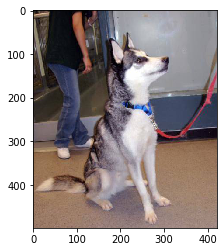

In [111]:
img_path = '/home/admin1/opencv/Convolutional-Neural-Networks/Convolutional_Neural_Networks/dataset/test_set/dogs/dog.4001.jpg'
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [112]:
image.shape

(499, 421, 3)

In [113]:
image = image / 255
image = cv2.resize(image, (150, 150))
image.shape

(150, 150, 3)

In [114]:
image = image.astype('float32')
image = np.reshape(image, (1, 150,150,3))
image.shape

(1, 150, 150, 3)

In [115]:
prediction = model.predict(image, batch_size = None, steps = 1)
prediction

array([[0.68600863]], dtype=float32)

In [117]:
prediction = prediction > 0.5
if prediction:
    print('The given image is of a Dog')
else:
    print('The given image is of a Cat')

The given image is of a Dog


In [119]:
model.predict_classes(image) #Gives the predicted class directly

array([[1]], dtype=int32)

In [126]:
image1 = cv2.imread(img_path)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

In [137]:
print(prediction[0])
print(prediction[0, 0])

[ True]
True


In [133]:
value

'Dog :1.00'

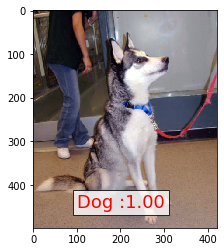

In [149]:
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(100, 452,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(100, 452,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(image1)
plt.show()

In [153]:
'%1.2f'%True

'1.00'